## Data Collection

The dataset can be accessed at: https://archive.ics.uci.edu/dataset/352/online+retail  

Variable information:
- InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this codes start with letter "c", it illustates a cancellation.
- StockCode: Product code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
- Description: Product name. Nominal
- Quantity: The quantities of each product per transaction. Numeric
- InvoiceDate: Invoice date and time, it indicates the date and time when each transaction was generated. Numeric
- UnitPrice: Product price per unit in sterling. Numeric
- CustomerID: Customer number. Numeric, a 5-digit integral number uniquely assigned to each customer
- Country: The name of the country where each transaction resides. Nominal


## Data Pre-processing

In [1]:
# Import 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing data

sales = pd.read_csv('Online Retail.csv')
sales.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
## Exploring dataset

sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


<div style="background-color: lightblue;"> There are 2 attributes that are float64, 1 attribute that is int64, and 5 attributes that are object.</div>

In [8]:
sales.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


<div style="background-color: lightblue;"> The result shows the basic statistics of the dataset which are central tendency and quartiles. </div>

In [11]:
sales.shape

(541909, 8)

<div style="background-color: lightblue;"> This dataset has 541909 rows and 8 columns. </div>

In [13]:
# Checking missing value
sales.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

<div style="background-color: lightblue;"> The dataset has 1454 missing values in Description attribute, and 135080 missing values in CustomerID atrribute. We are going to handle these missing values by filling "Unknown" for Description attribute and random values for CustomerID. </div>

In [15]:
import random

# Handle missing values

# fill missing descriptions with "Unknown":
sales['Description'].fillna('Unknown', inplace=True)

# Filling missing customer IDs with random values
sales['CustomerID'].fillna(random.randint(10000, 99999), inplace=True)

# Checking after filling missing values:
sales.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

<div style="background-color: lightblue;"> After handling missing values, the dataset has 0 missing value. </div>

In [17]:
# Checking duplicate

duplicate_count = sales.duplicated().sum()
duplicate_rows = sales[sales.duplicated(keep=False)]
print("Number of duplicate rows:", duplicate_count)
print("Duplicate rows:")
print(duplicate_rows)

Number of duplicate rows: 5268
Duplicate rows:
       InvoiceNo StockCode                       Description  Quantity  \
485       536409     22111      SCOTTIE DOG HOT WATER BOTTLE         1   
489       536409     22866     HAND WARMER SCOTTY DOG DESIGN         1   
494       536409     21866       UNION JACK FLAG LUGGAGE TAG         1   
517       536409     21866       UNION JACK FLAG LUGGAGE TAG         1   
521       536409     22900   SET 2 TEA TOWELS I LOVE LONDON          1   
...          ...       ...                               ...       ...   
541675    581538     22068       BLACK PIRATE TREASURE CHEST         1   
541689    581538     23318    BOX OF 6 MINI VINTAGE CRACKERS         1   
541692    581538     22992            REVOLVER WOODEN RULER          1   
541699    581538     22694                      WICKER STAR          1   
541701    581538     23343      JUMBO BAG VINTAGE CHRISTMAS          1   

            InvoiceDate  UnitPrice  CustomerID         Country  

<div style="background-color: lightblue;"> We have 5268 duplicate values in the dataset. We are going to solve it by remove all the duplicated values. </div>

In [19]:
# Remove duplicated values
sales = sales.drop_duplicates()

#Checking after removing duplicate values:

duplicate_count = sales.duplicated().sum()
duplicate_rows = sales[sales.duplicated(keep=False)]
print("Number of duplicate rows:", duplicate_count)
sales.shape

Number of duplicate rows: 0


(536641, 8)

<div style="background-color: lightblue;"> After removing duplicate rows, the dataset has 536641 rows and 8 columns. </div>

In [22]:
# Checking negative and 0 values of Quantity and UnitPrice:


negative_unit_price = sales[sales['UnitPrice'] <= 0]

negative_quantity = sales[sales['Quantity'] <= 0]

# Print the count of negative and 0 values:

print("\nCount of negative and 0 UnitPrice values:", len(negative_unit_price))
print("Count of negative and 0 Quantity values:", len(negative_quantity))


Count of negative and 0 UnitPrice values: 2512
Count of negative and 0 Quantity values: 10587


<div style="background-color: lightblue;"> The negative values in these attributes are unacceptable. However, we have lots of negative values for Quantities and Unitprice which can lead to noisy data. Therefore, we are going to remove all of this data. </div>

In [25]:
# Removing negative values from Quantities and UnitPrice column

sales=sales[(sales['Quantity']>0) & (sales['UnitPrice']>0)]

# Checking cancelled invoice:

sales['InvoiceNo'].apply(str).str.startswith('C').sum()



0

In [27]:
sales.shape

(524878, 8)

<div style="background-color: lightblue;"> As we already remove negative values in both Quantity and UnitPrice attributes, we no longer have cancelled invoice.

After removing those negatives values, the dataset has 524878 raws and 8 colunms. </div>

<div style="background-color: lightsalmon;"> Quantity and UnitPrice are numeric attributes that should be checked outliers. However, the outliers from the UnitPrice attribute can be meaningful because the UnitPrice is fixed and it depends on which the product is. Besides, some products are cheap while some products can be expensive. Then we skip the detection for outliers of UnitPrice. </div>

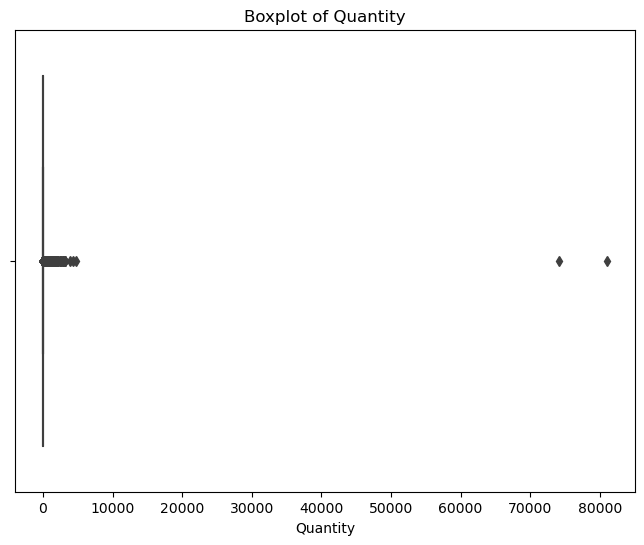

In [30]:
# Visualizing outliers of Quantity:

plt.figure(figsize=(8, 6))  
sns.boxplot(x=sales["Quantity"])  
plt.title("Boxplot of Quantity")
plt.show()


In [32]:
# Detecing outliers of Quantity:

Q1 = sales['Quantity'].quantile(0.25)
Q3 = sales['Quantity'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = sales[(sales['Quantity'] < lower_bound) | (sales['Quantity'] > upper_bound)]

total_data_count = len(sales)
total_outliers_percentage = len(outliers) / len(sales)
print("Number of data count:",len(sales))
print("Number of outliers:", len(outliers))
print("Outliers percentage (%):", (len(outliers) / len(sales)*100))

Number of data count: 524878
Number of outliers: 27111
Outliers percentage (%): 5.165200294163596


<div style="background-color: lightblue;"> The number of outliers of Quantity is 27,111 which is around 5% of the dataset. Moreover, the outliers of Quantity may come from the discount, but our dataset does not include information about the discount. Therefore, we decided to remove these outliers because they cannot impact to whole data. </div>

In [35]:
# Removing outliers of Quantity and UnitPrice

# Calculate percentiles of Quantity:
q_low = sales["Quantity"].quantile(0.25) 
q_hi  = sales["Quantity"].quantile(0.75)

IQR=q_hi-q_low

# Filter out outliers of Quantity:
sales=sales[~((sales['Quantity']<(q_low-1.5*IQR)) | (sales['Quantity']>(q_hi+1.5*IQR)))]

print('Dataset shape after removing outliers: ',sales.shape)

Dataset shape after removing outliers:  (497767, 8)


<div style="background-color: lightblue;"> We have already removed all of outliers of Quantity and UnitPrice attributes. After removing those outliers, the dataset has 497767 rows and 8 colunms. </div>

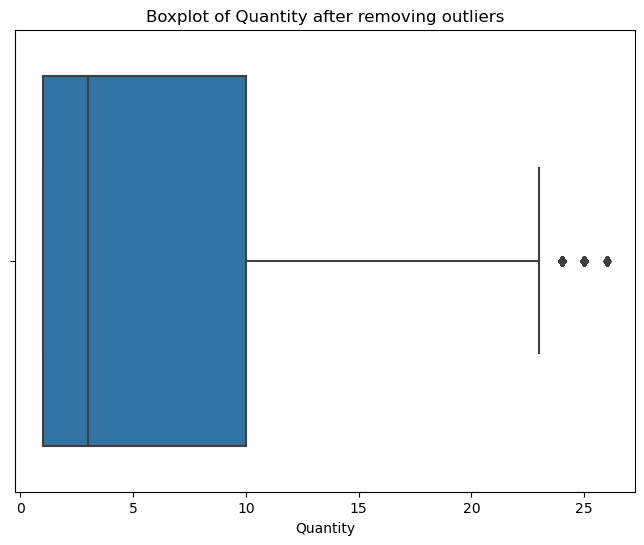

In [38]:
# boxplot to visualize after removing the outliers:

plt.figure(figsize=(8, 6))  
sns.boxplot(x=sales["Quantity"])  
plt.title("Boxplot of Quantity after removing outliers")
plt.show()


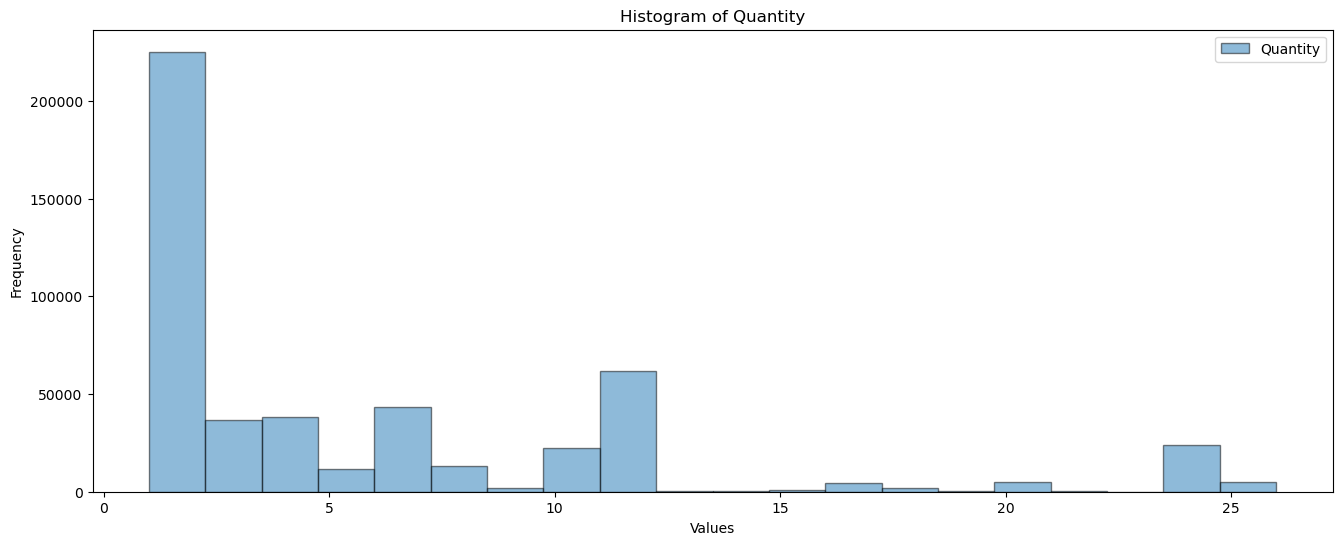

In [40]:
# The distributions of Quantity after removing outliers:

columns = ['Quantity']

plt.figure(figsize=(16, 6))  

for column in columns:
    sales[column].plot(kind='hist', edgecolor='k', alpha=0.5, bins=20, label=column)

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Quantity')
plt.legend()
plt.show()

<div style="background-color: lightblue;"> The histogram shows that the value of 2 has the most frequency, which is more than 200000. The highest frequency value is extremely far from the other values under 50000. </div>

<div style="background-color: lightsalmon;"> We are almost done with the data-processing phase. However, we are going to analyze the data about Online Retail and have to create a new feature which is total sales, which will be useful for our analysis. </div>

## Feature Creation

In [44]:
# Creating new feature sales from Quantity and Unitprice:

sales['TotalSales'] = sales['Quantity'] * sales['UnitPrice']

print(sales.head())



  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  TotalSales  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom       15.30  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom       20.34  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom       22.00  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom       20.34  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom       20.34  


In [46]:
# Print new data with TotalSales feature

sales.to_csv('total_sales.csv', index=False)


In [48]:
total_sales = pd.read_csv('total_sales.csv')
total_sales.head(5)

/tmp/ipykernel_79/3920875772.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  total_sales = pd.read_csv('total_sales.csv')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [50]:
# Central Tendency:
total_sales.describe()

,Quantity,UnitPrice,CustomerID,TotalSales
count,497767.000000,497767.000000,497767.000000,497767.000000
mean,5.883108,4.049788,29218.522317,13.593931
std,6.281662,37.045316,23362.374963,40.210337
min,1.000000,0.001000,12347.000000,0.001000
25%,1.000000,1.250000,14422.000000,3.750000
50%,3.000000,2.100000,16364.000000,8.850000
75%,10.000000,4.130000,68285.000000,16.630000
max,26.000000,13541.330000,68285.000000,13541.330000


<div style="background-color: lightblue;"> The result indicates the basic statistics of cleaned dataset which are central tendency and quartiles.</div>

In [53]:
# Convert InvoiceDate to datetime 
total_sales['InvoiceDate'] = pd.to_datetime(total_sales['InvoiceDate'])

total_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497767 entries, 0 to 497766
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    497767 non-null  object        
 1   StockCode    497767 non-null  object        
 2   Description  497767 non-null  object        
 3   Quantity     497767 non-null  int64         
 4   InvoiceDate  497767 non-null  datetime64[ns]
 5   UnitPrice    497767 non-null  float64       
 6   CustomerID   497767 non-null  float64       
 7   Country      497767 non-null  object        
 8   TotalSales   497767 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 34.2+ MB


<div style="background-color: lightblue;"> The InvoiceDate attibute datatype is changed to datatime64[ns] </div>

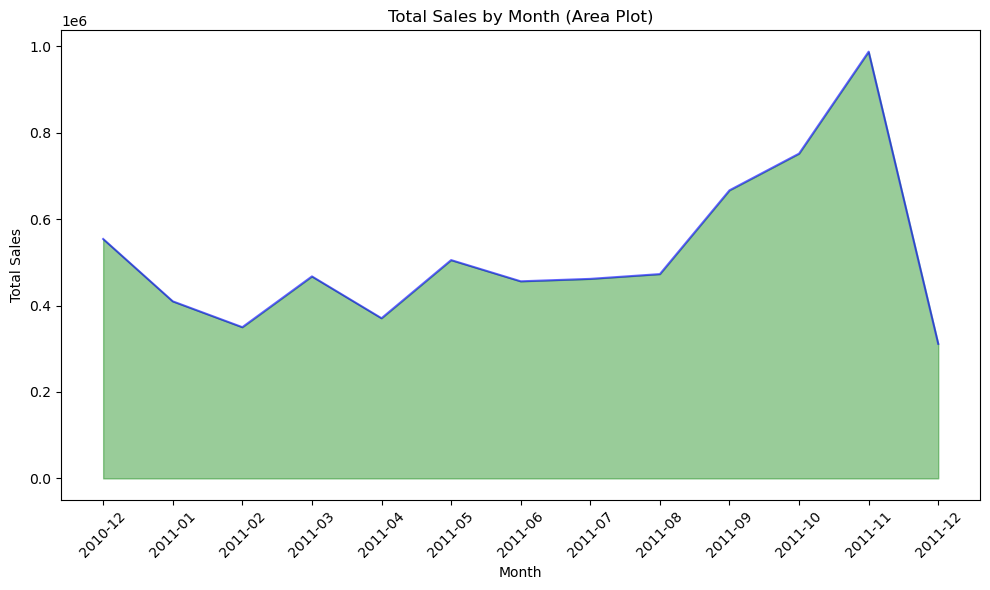

In [56]:
## Visualizing Total Sales by Month

# Extracting month and year from InvoiceDate
total_sales['YearMonth'] = total_sales['InvoiceDate'].dt.to_period('M')

# Grouping data by month and calculating total sales for each month
monthly_sales = total_sales.groupby('YearMonth')['TotalSales'].sum().reset_index()

# Plotting the area chart
plt.figure(figsize=(10, 6))
plt.fill_between(monthly_sales['YearMonth'].astype(str), monthly_sales['TotalSales'], color='green', alpha=0.4)

# Plotting a line on top of the filled area for better visualization
plt.plot(monthly_sales['YearMonth'].astype(str), monthly_sales['TotalSales'], color='blue', alpha=0.6)

# Labeling axes and title
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales by Month (Area Plot)')

# Rotating x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


<div style="background-color: lightblue;"> As the result shows, the Total Sales fluctuated at the beginning of the chart until August 2011. Then, the Total Sales peaked in November 2011, which was nearly 1 million, before dropping significantly in December 2021.</div>

In [104]:
pip install wordcloud


Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


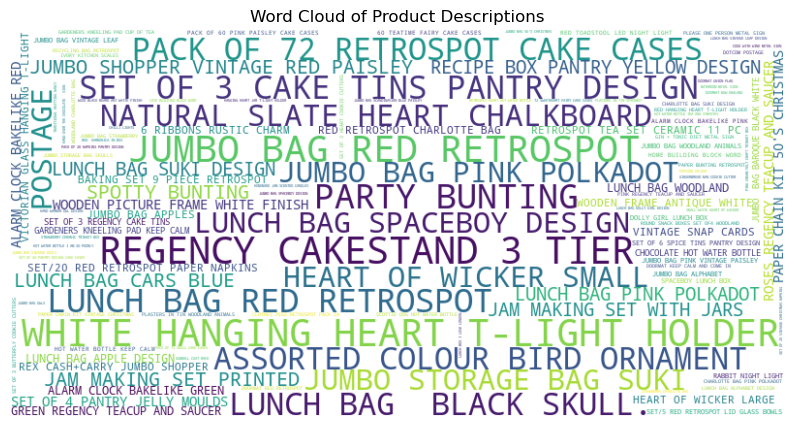

Number of Unique product descriptions: 4007


In [59]:
## Visualizing the wordcloud of Description

from wordcloud import WordCloud

# Filter data for a specific period (e.g., a month)
start_date = pd.to_datetime('2010-12-01')
end_date = pd.to_datetime('2011-12-31')

filtered_data = total_sales[(total_sales['InvoiceDate'] >= start_date) & (total_sales['InvoiceDate'] <= end_date)]

# Group by 'Description' and count occurrences
description_counts = filtered_data['Description'].value_counts()

# Generate a WordCloud based on frequency
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(description_counts)

# Display the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Product Descriptions')
plt.show()

print(f"Number of Unique product descriptions: {total_sales['Description'].nunique()}")



<div style="background-color: lightblue;"> As can be seen from Word Cloud, words that appear more frequently in the descriptions will be displayed with larger font sizes which are White, Hanging, Heart, T-Light, and Holder compared with a total of over 4000 unit Descriptions. </div>

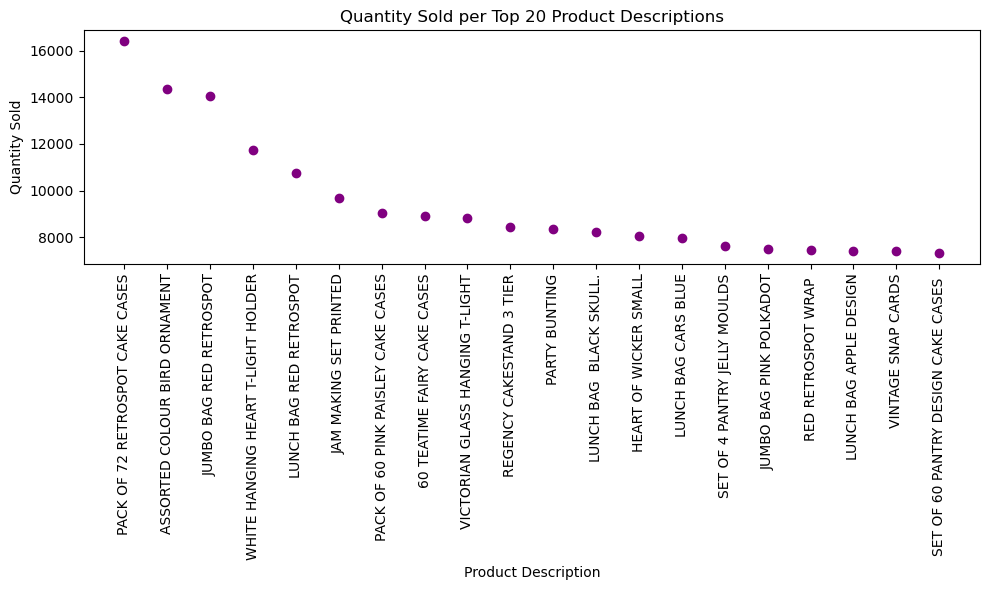

In [62]:
## Visualizing the Quantity sold per top 20 Product Description

# Group by 'Description' and sum the quantities sold
quantity_sold = total_sales.groupby('Description')['Quantity'].sum()

# Select the top 20 descriptions by quantity sold
top_20_descriptions = quantity_sold.nlargest(20)

# Extract quantities and descriptions for the top 20
top_20_quantities = top_20_descriptions.values
top_20_description_names = top_20_descriptions.index

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(top_20_description_names, top_20_quantities, color='purple')

# Labeling axes and title
plt.xlabel('Product Description')
plt.ylabel('Quantity Sold')
plt.title('Quantity Sold per Top 20 Product Descriptions')

# Rotating x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()


<div style="background-color: lightblue;"> As the result shows, the top 5 Product Descriptions have over 10000 Quantities sold, while 15 other Product Descriptions have the quantity sold between 8000 to 10000.</div>

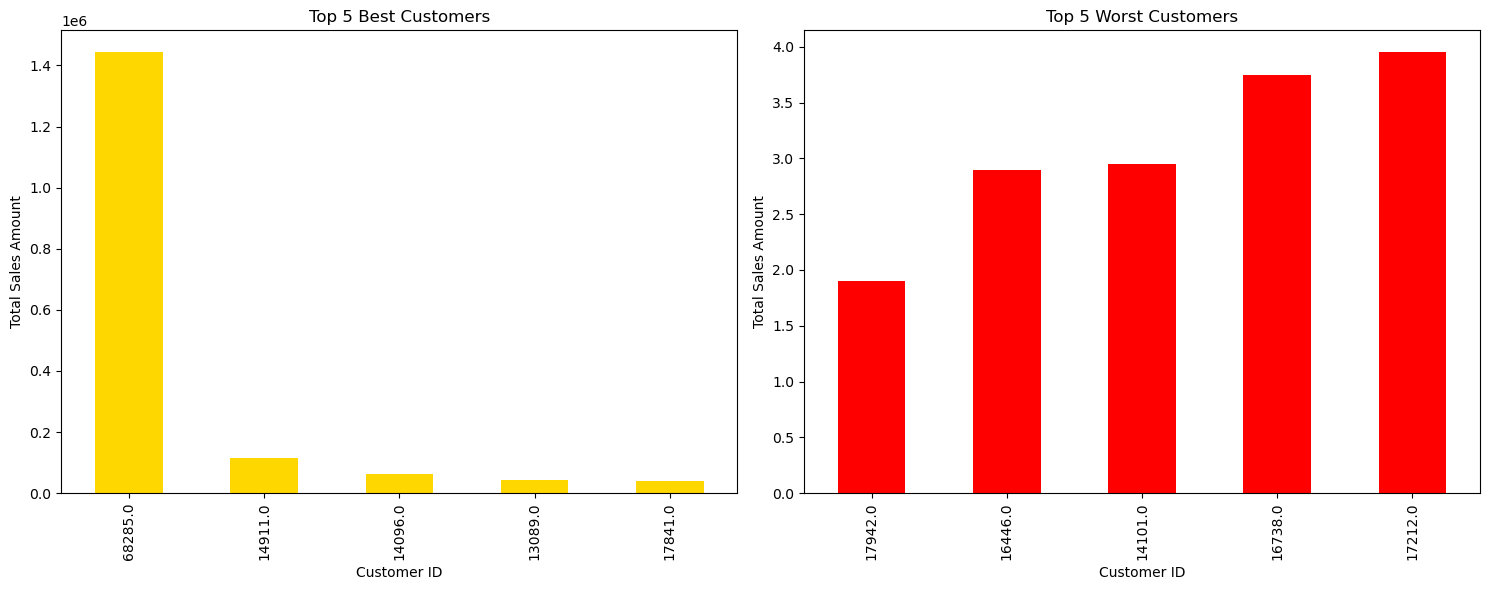

In [65]:
## Visualizing the Total Sales of the top and bottom 5 customers

# Grouping by 'CustomerID' and sum of  'TotalSales' for each customer
customer_total_sales = total_sales.groupby('CustomerID')['TotalSales'].sum()

# Top 5 best customers based on total sales amount
best_customers = customer_total_sales.sort_values(ascending=False).head(5)

# Top 5 worst customers based on total sales amount
worst_customers = customer_total_sales.sort_values(ascending=True).head(5)

# Display of bar charts for better visualization
plt.figure(figsize=(15, 6))

# Best customers
plt.subplot(1, 2, 1)
best_customers.plot(kind='bar', color='gold')
plt.title('Top 5 Best Customers')
plt.xlabel('Customer ID')
plt.ylabel('Total Sales Amount')

# Worst customers
plt.subplot(1, 2, 2)
worst_customers.plot(kind='bar', color='red')
plt.title('Top 5 Worst Customers')
plt.xlabel('Customer ID')
plt.ylabel('Total Sales Amount')

plt.tight_layout()
plt.show()


<div style="background-color: lightblue;"> As can be seen from the bar chart, Customer ID 72662.0 has the highest Total Sales Amount which is over 1.4 million, while the other of the top five has under 0.2 million. On the other hand, Customer ID 17942.0 has the lowest Total Sales Amount which is 2, and the orders of the bottom have sales between 2.5 and 4. </div>

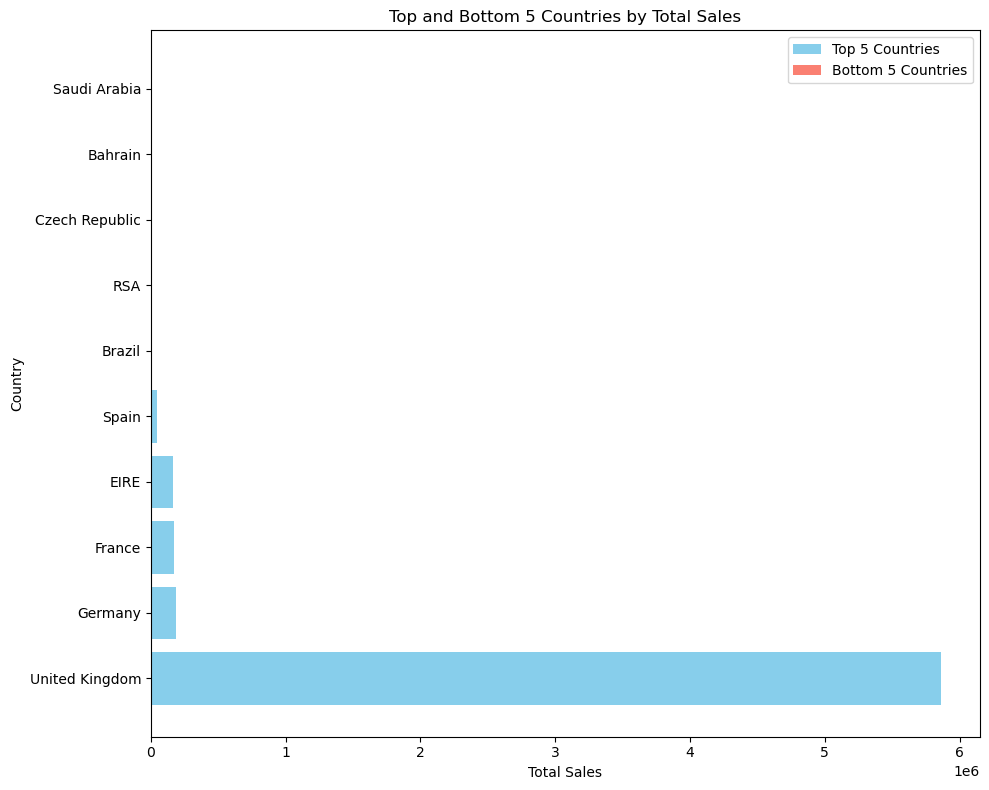

In [68]:
## Visualizing the Total Sales of the top and bottom 5 countries

# Group by 'Country' and sum the total sales
country_sales = total_sales.groupby('Country')['TotalSales'].sum().reset_index()

# Sort the countries based on total sales (highest to lowest)
sorted_countries = country_sales.sort_values(by='TotalSales', ascending=False)

# Extract top 5 and bottom 5 countries
top_5_countries = sorted_countries.head(5)
bottom_5_countries = sorted_countries.tail(5)

# Plotting the horizontal bar chart for top and bottom countries
plt.figure(figsize=(10, 8))
plt.barh(top_5_countries['Country'], top_5_countries['TotalSales'], color='skyblue', label='Top 5 Countries')
plt.barh(bottom_5_countries['Country'], bottom_5_countries['TotalSales'], color='salmon', label='Bottom 5 Countries')

# Labeling axes and title
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.title('Top and Bottom 5 Countries by Total Sales')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()



<div style="background-color: lightblue;"> As the chart shows, the United Kingdom has the highest Total Sales, which is nearly 6 million, while Spain, EIRE, France, and Germany's Total Sales are around 0.5 million. On the other hand, Saudi Arabia, Bahrain, the Czech Republic, and RSA are the countries that have the lowest Total Sales, which is almost 0. </div>

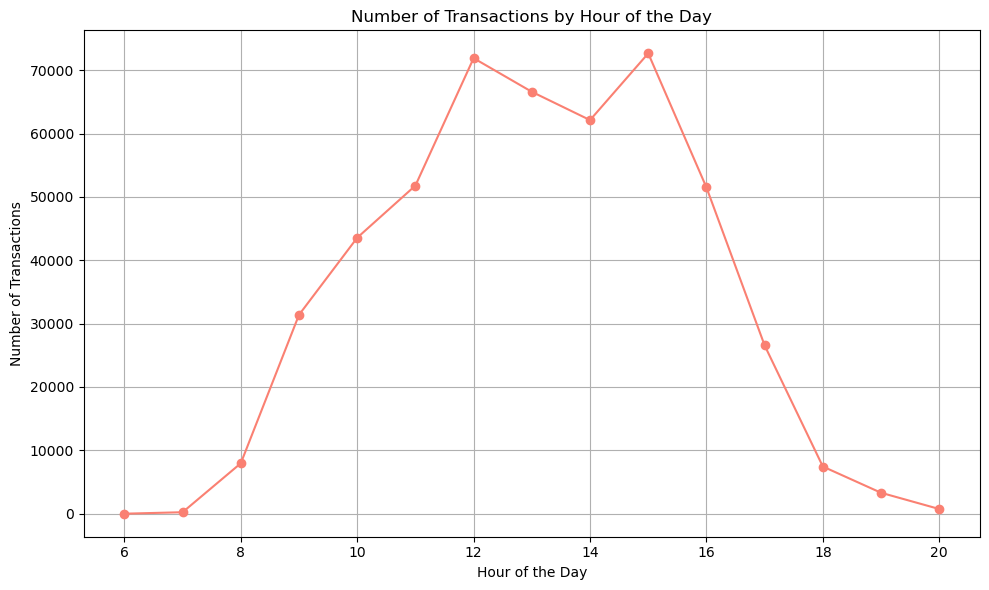

In [71]:
## Visualizing the number of Transactions by Hour of the Day


# Extract hour information from 'InvoiceDate'
total_sales['Hour'] = total_sales['InvoiceDate'].dt.hour

# Group by hour and count the number of transactions
transactions_by_hour = total_sales.groupby('Hour').size()

# Plotting the number of transactions by hour using a line plot
plt.figure(figsize=(10, 6))
plt.plot(transactions_by_hour.index, transactions_by_hour.values, marker='o', linestyle='-', color='salmon')

# Labeling axes and title
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions by Hour of the Day')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


<div style="background-color: lightblue;"> From the line chart, the number of transactions starts to increase at 8 o’clock from nearly 10000 to reach a peak of over 70000. After slightly decreasing until 14 o’clock, its transactions reach a peak again at around 15 o’clock. Then, its figure fell until 20 o’clock.</div>